In [129]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import plotly as py
import plotly.express as px
import plotly.graph_objects as go

import webbrowser

import io
import requests

#slideshow terminal url
#jupyter nbconvert Austin_Housing_Prices.ipynb --to slides --post serve

In [130]:
#housing excel file
url="https://www.zillow.com/market-report/04-20/10221/austin-tx.xls?rt=8"
webbrowser.open(url)

True

In [ ]:
import jupyterthemes

In [133]:
cd Downloads

/Users/mdawg/Downloads


In [124]:
ls -a | grep austin-tx-cities-Report

austin-tx-cities-Report.xls


In [4]:
df = pd.read_csv('austin_home_prices.csv')

In [5]:
df.head()

Region Name   Region Type  Data Type    Apr 2010    May 2010    Jun 2010  \
0         Austin          city  All Homes    $233,300    $233,400    $233,100   
1      Allandale  neighborhood  All Homes    $340,700    $339,900    $338,700   
2   Barton Creek  neighborhood  All Homes  $1,019,100  $1,021,200  $1,017,800   
3   Barton Hills  neighborhood  All Homes    $377,600    $378,800    $379,200   
4  Bouldin Creek  neighborhood  All Homes    $351,000    $350,600    $350,600   

     Jul 2010    Aug 2010    Sep 2010  Oct 2010  ...    Jun 2019    Jul 2019  \
0    $232,600    $231,400    $230,400  $229,700  ...    $384,000    $385,300   
1    $337,600    $336,300    $335,400  $334,800  ...    $593,500    $595,100   
2  $1,014,700  $1,006,700  $1,001,100  $996,600  ...  $1,344,800  $1,350,600   
3    $379,000    $376,400    $376,200  $376,300  ...    $665,500    $667,900   
4    $352,300    $353,300    $353,800  $353,600  ...    $680,300    $684,800   

     Aug 2019    Sep 2019    Oct 2019    Nov 2019    Dec 2019    Jan 2020  \
0    $386,600    $388,900    $390,200    $392,500    $394,400    $396,800   
1    $597,000    $601,100    $604,100    $608,200    $609,500    $612,800   
2  $1,353,600  $1,361,100  $1,363,300  $1,370,100  $1,370,200  $1,373,200   
3    $668,900    $672,500    $675,700    $680,200    $682,300    $683,000   
4    $688,600    $694,600    $698,400    $703,700    $705,500    $707,000   

     Feb 2020    Mar 2020  
0    $398,700    $402,000  
1    $615,100    $621,300  
2  $1,374,700  $1,384,600  
3    $685,100    $690,100  
4    $706,300    $710,300  

[5 rows x 123 columns]

In [6]:
#drop all cols not like 'Dec' or 'Region Name'
columns = [col for col in df if col.startswith('Dec')]
region = [col for col in df if col.startswith('Region Name')]
all_cols = list(region+columns)
df = df[all_cols]
df.head(10)

Region Name  Dec 2010  Dec 2011    Dec 2012    Dec 2013  \
0               Austin  $228,300  $226,300    $240,200    $273,300   
1            Allandale  $334,700  $345,900    $369,400    $433,300   
2         Barton Creek  $988,200  $968,800  $1,021,200  $1,133,000   
3         Barton Hills  $375,100  $381,100    $416,700    $480,200   
4        Bouldin Creek  $352,000  $357,300    $397,400    $466,100   
5            Brentwood  $270,200  $280,100    $297,800    $346,900   
6         Bryker Woods  $486,000  $491,300    $530,100    $624,800   
7  Central East Austin  $221,000  $223,500    $238,900    $297,100   
8             Chestnut  $224,700  $229,900    $249,400    $298,800   
9       Coronado Hills  $147,400  $138,400    $147,700    $163,600   

     Dec 2014    Dec 2015    Dec 2016    Dec 2017    Dec 2018    Dec 2019  
0    $300,200    $323,900    $345,500    $361,000    $376,200    $394,400  
1    $476,200    $506,100    $524,200    $549,500    $579,100    $609,500  
2  $1,233,900  $1,266,300  $1,267,000  $1,289,900  $1,312,200  $1,370,200  
3    $540,000    $567,300    $601,500    $625,600    $640,300    $682,300  
4    $542,600    $567,500    $596,900    $620,600    $647,400    $705,500  
5    $390,200    $411,000    $436,500    $450,900    $461,300    $480,100  
6    $694,100    $730,600    $772,900    $793,900    $825,700    $848,700  
7    $357,600    $388,300    $404,200    $420,700    $453,300    $477,500  
8    $351,100    $380,500    $392,800    $410,300    $433,100    $451,800  
9    $190,700    $213,300    $241,600    $246,400    $261,700    $266,900

In [7]:
#convert to number/remove $ signs
df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [8]:
df.head()

Region Name  Dec 2010  Dec 2011   Dec 2012   Dec 2013   Dec 2014  \
0         Austin  228300.0  226300.0   240200.0   273300.0   300200.0   
1      Allandale  334700.0  345900.0   369400.0   433300.0   476200.0   
2   Barton Creek  988200.0  968800.0  1021200.0  1133000.0  1233900.0   
3   Barton Hills  375100.0  381100.0   416700.0   480200.0   540000.0   
4  Bouldin Creek  352000.0  357300.0   397400.0   466100.0   542600.0   

    Dec 2015   Dec 2016   Dec 2017   Dec 2018   Dec 2019  
0   323900.0   345500.0   361000.0   376200.0   394400.0  
1   506100.0   524200.0   549500.0   579100.0   609500.0  
2  1266300.0  1267000.0  1289900.0  1312200.0  1370200.0  
3   567300.0   601500.0   625600.0   640300.0   682300.0  
4   567500.0   596900.0   620600.0   647400.0   705500.0

In [9]:
for col in df.columns:
    if col.startswith('Dec'):
        df[col] = df[col].astype(float)

In [10]:
df.dtypes

Region Name     object
Dec 2010       float64
Dec 2011       float64
Dec 2012       float64
Dec 2013       float64
Dec 2014       float64
Dec 2015       float64
Dec 2016       float64
Dec 2017       float64
Dec 2018       float64
Dec 2019       float64
dtype: object

In [11]:
#add percent change year over year columns
df['%_diff_2011'] = (df['Dec 2011'] - df['Dec 2010'])/df['Dec 2010'] * 100
df['%_diff_2012'] = (df['Dec 2012'] - df['Dec 2011'])/df['Dec 2011'] * 100
df['%_diff_2013'] = (df['Dec 2013'] - df['Dec 2012'])/df['Dec 2012'] * 100
df['%_diff_2014'] = (df['Dec 2014'] - df['Dec 2013'])/df['Dec 2013'] * 100
df['%_diff_2015'] = (df['Dec 2015'] - df['Dec 2014'])/df['Dec 2014'] * 100
df['%_diff_2016'] = (df['Dec 2016'] - df['Dec 2015'])/df['Dec 2015'] * 100
df['%_diff_2017'] = (df['Dec 2017'] - df['Dec 2016'])/df['Dec 2016'] * 100
df['%_diff_2018'] = (df['Dec 2018'] - df['Dec 2017'])/df['Dec 2017'] * 100
df['%_diff_2019'] = (df['Dec 2019'] - df['Dec 2018'])/df['Dec 2018'] * 100

In [12]:
df.head(10)

Region Name  Dec 2010  Dec 2011   Dec 2012   Dec 2013   Dec 2014  \
0               Austin  228300.0  226300.0   240200.0   273300.0   300200.0   
1            Allandale  334700.0  345900.0   369400.0   433300.0   476200.0   
2         Barton Creek  988200.0  968800.0  1021200.0  1133000.0  1233900.0   
3         Barton Hills  375100.0  381100.0   416700.0   480200.0   540000.0   
4        Bouldin Creek  352000.0  357300.0   397400.0   466100.0   542600.0   
5            Brentwood  270200.0  280100.0   297800.0   346900.0   390200.0   
6         Bryker Woods  486000.0  491300.0   530100.0   624800.0   694100.0   
7  Central East Austin  221000.0  223500.0   238900.0   297100.0   357600.0   
8             Chestnut  224700.0  229900.0   249400.0   298800.0   351100.0   
9       Coronado Hills  147400.0  138400.0   147700.0   163600.0   190700.0   

    Dec 2015   Dec 2016   Dec 2017   Dec 2018   Dec 2019  %_diff_2011  \
0   323900.0   345500.0   361000.0   376200.0   394400.0    -0.876040   
1   506100.0   524200.0   549500.0   579100.0   609500.0     3.346280   
2  1266300.0  1267000.0  1289900.0  1312200.0  1370200.0    -1.963165   
3   567300.0   601500.0   625600.0   640300.0   682300.0     1.599573   
4   567500.0   596900.0   620600.0   647400.0   705500.0     1.505682   
5   411000.0   436500.0   450900.0   461300.0   480100.0     3.663953   
6   730600.0   772900.0   793900.0   825700.0   848700.0     1.090535   
7   388300.0   404200.0   420700.0   453300.0   477500.0     1.131222   
8   380500.0   392800.0   410300.0   433100.0   451800.0     2.314197   
9   213300.0   241600.0   246400.0   261700.0   266900.0    -6.105834   

   %_diff_2012  %_diff_2013  %_diff_2014  %_diff_2015  %_diff_2016  \
0     6.142289    13.780183     9.842664     7.894737     6.668725   
1     6.793871    17.298322     9.900762     6.278874     3.576368   
2     5.408753    10.947904     8.905560     2.625821     0.055279   
3     9.341380    15.238781    12.453145     5.055556     6.028556   
4    11.223062    17.287368    16.412787     4.589016     5.180617   
5     6.319172    16.487576    12.481983     5.330600     6.204380   
6     7.897415    17.864554    11.091549     5.258608     5.789762   
7     6.890380    24.361658    20.363514     8.585011     4.094772   
8     8.481949    19.807538    17.503347     8.373683     3.232589   
9     6.719653    10.765064    16.564792    11.851075    13.267698   

   %_diff_2017  %_diff_2018  %_diff_2019  
0     4.486252     4.210526     4.837852  
1     4.826402     5.386715     5.249525  
2     1.807419     1.728816     4.420058  
3     4.006650     2.349744     6.559425  
4     3.970514     4.318402     8.974359  
5     3.298969     2.306498     4.075439  
6     2.717040     4.005542     2.785515  
7     4.082138     7.748990     5.338628  
8     4.455193     5.556910     4.317710  
9     1.986755     6.209416     1.987008

In [13]:
#show all columns
list(df.columns)

['Region Name',
 'Dec 2010',
 'Dec 2011',
 'Dec 2012',
 'Dec 2013',
 'Dec 2014',
 'Dec 2015',
 'Dec 2016',
 'Dec 2017',
 'Dec 2018',
 'Dec 2019',
 '%_diff_2011',
 '%_diff_2012',
 '%_diff_2013',
 '%_diff_2014',
 '%_diff_2015',
 '%_diff_2016',
 '%_diff_2017',
 '%_diff_2018',
 '%_diff_2019']

In [14]:
#create a variable/list of region name and percent columns
percent_cols = [
 'Region Name',
 '%_diff_2011',
 '%_diff_2012',
 '%_diff_2013',
 '%_diff_2014',
 '%_diff_2015',
 '%_diff_2016',
 '%_diff_2017',
 '%_diff_2018',
 '%_diff_2019']

In [15]:
#create new dataframe with percent_cols variable
df2 = df[percent_cols]

In [16]:
df2.head()

Region Name  %_diff_2011  %_diff_2012  %_diff_2013  %_diff_2014  \
0         Austin    -0.876040     6.142289    13.780183     9.842664   
1      Allandale     3.346280     6.793871    17.298322     9.900762   
2   Barton Creek    -1.963165     5.408753    10.947904     8.905560   
3   Barton Hills     1.599573     9.341380    15.238781    12.453145   
4  Bouldin Creek     1.505682    11.223062    17.287368    16.412787   

   %_diff_2015  %_diff_2016  %_diff_2017  %_diff_2018  %_diff_2019  
0     7.894737     6.668725     4.486252     4.210526     4.837852  
1     6.278874     3.576368     4.826402     5.386715     5.249525  
2     2.625821     0.055279     1.807419     1.728816     4.420058  
3     5.055556     6.028556     4.006650     2.349744     6.559425  
4     4.589016     5.180617     3.970514     4.318402     8.974359

In [17]:
#stack the dataframe to only 3 columns
df2 = df2.stack().reset_index()

In [18]:
#drop all rows like Region Name and rename columns
df2 = df2.drop(df2[df2.level_1.eq('Region Name')].index)
df2.columns = ['Neighborhood','year','%_diff']
df2.head(50)

Neighborhood         year     %_diff
1              0  %_diff_2011   -0.87604
2              0  %_diff_2012    6.14229
3              0  %_diff_2013    13.7802
4              0  %_diff_2014    9.84266
5              0  %_diff_2015    7.89474
6              0  %_diff_2016    6.66872
7              0  %_diff_2017    4.48625
8              0  %_diff_2018    4.21053
9              0  %_diff_2019    4.83785
11             1  %_diff_2011    3.34628
12             1  %_diff_2012    6.79387
13             1  %_diff_2013    17.2983
14             1  %_diff_2014    9.90076
15             1  %_diff_2015    6.27887
16             1  %_diff_2016    3.57637
17             1  %_diff_2017     4.8264
18             1  %_diff_2018    5.38672
19             1  %_diff_2019    5.24953
21             2  %_diff_2011   -1.96317
22             2  %_diff_2012    5.40875
23             2  %_diff_2013    10.9479
24             2  %_diff_2014    8.90556
25             2  %_diff_2015    2.62582
26             2  %_diff_2016  0.0552792
27             2  %_diff_2017    1.80742
28             2  %_diff_2018    1.72882
29             2  %_diff_2019    4.42006
31             3  %_diff_2011    1.59957
32             3  %_diff_2012    9.34138
33             3  %_diff_2013    15.2388
34             3  %_diff_2014    12.4531
35             3  %_diff_2015    5.05556
36             3  %_diff_2016    6.02856
37             3  %_diff_2017    4.00665
38             3  %_diff_2018    2.34974
39             3  %_diff_2019    6.55943
41             4  %_diff_2011    1.50568
42             4  %_diff_2012    11.2231
43             4  %_diff_2013    17.2874
44             4  %_diff_2014    16.4128
45             4  %_diff_2015    4.58902
46             4  %_diff_2016    5.18062
47             4  %_diff_2017    3.97051
48             4  %_diff_2018     4.3184
49             4  %_diff_2019    8.97436
51             5  %_diff_2011    3.66395
52             5  %_diff_2012    6.31917
53             5  %_diff_2013    16.4876
54             5  %_diff_2014     12.482
55             5  %_diff_2015     5.3306

In [19]:
#create a variable/dictionary with the index and the neighborhoods
mapping = dict(df['Region Name'])
mapping

{0: 'Austin',
 1: 'Allandale',
 2: 'Barton Creek',
 3: 'Barton Hills',
 4: 'Bouldin Creek',
 5: 'Brentwood',
 6: 'Bryker Woods',
 7: 'Central East Austin',
 8: 'Chestnut',
 9: 'Coronado Hills',
 10: 'Crestview',
 11: 'Dawson',
 12: 'Downtown',
 13: 'East Cesar Chavez',
 14: 'East Congress',
 15: 'East Oak Hill',
 16: 'Franklin Park',
 17: 'Galindo',
 18: 'Garrison Park',
 19: 'Georgian Acres',
 20: 'Govalle',
 21: 'Hancock',
 22: 'Heritage Hills',
 23: 'Highland',
 24: 'Holly',
 25: 'Hyde Park',
 26: 'Johnston Terrace',
 27: 'Jollyville',
 28: 'MLK',
 29: 'MLK 183',
 30: 'Mckinney',
 31: 'Montopolis',
 32: 'Mueller',
 33: 'North Austin',
 34: 'North Burnett',
 35: 'North Lamar',
 36: 'North Loop',
 37: 'North Shoal Creek',
 38: 'North University',
 39: 'Old Enfield',
 40: 'Old West Austin',
 41: 'Parker Lane',
 42: 'Pecan Springs-Springdale',
 43: 'Pleasant Valley',
 44: 'Riverside',
 45: 'Rosedale',
 46: 'Rosewood',
 47: 'Shady Hollow',
 48: 'South Lamar',
 49: 'South Manchaca',
 50: 

In [20]:
#create a new column called Neighborhood_real and map to the mappings dictionary
df2['Neighborhood_real'] = df2['Neighborhood'].map(mapping)

In [21]:
#drop original Neighborhood column
df2 = df2[df2.columns.drop('Neighborhood')]

In [22]:
df2.head(20)

year   %_diff Neighborhood_real
1   %_diff_2011 -0.87604            Austin
2   %_diff_2012  6.14229            Austin
3   %_diff_2013  13.7802            Austin
4   %_diff_2014  9.84266            Austin
5   %_diff_2015  7.89474            Austin
6   %_diff_2016  6.66872            Austin
7   %_diff_2017  4.48625            Austin
8   %_diff_2018  4.21053            Austin
9   %_diff_2019  4.83785            Austin
11  %_diff_2011  3.34628         Allandale
12  %_diff_2012  6.79387         Allandale
13  %_diff_2013  17.2983         Allandale
14  %_diff_2014  9.90076         Allandale
15  %_diff_2015  6.27887         Allandale
16  %_diff_2016  3.57637         Allandale
17  %_diff_2017   4.8264         Allandale
18  %_diff_2018  5.38672         Allandale
19  %_diff_2019  5.24953         Allandale
21  %_diff_2011 -1.96317      Barton Creek
22  %_diff_2012  5.40875      Barton Creek

In [23]:
#round %_diff column
df2['%_diff'] = df2['%_diff'].apply(np.ceil).astype(float)
df2.head(20)

year  %_diff Neighborhood_real
1   %_diff_2011     0.0            Austin
2   %_diff_2012     7.0            Austin
3   %_diff_2013    14.0            Austin
4   %_diff_2014    10.0            Austin
5   %_diff_2015     8.0            Austin
6   %_diff_2016     7.0            Austin
7   %_diff_2017     5.0            Austin
8   %_diff_2018     5.0            Austin
9   %_diff_2019     5.0            Austin
11  %_diff_2011     4.0         Allandale
12  %_diff_2012     7.0         Allandale
13  %_diff_2013    18.0         Allandale
14  %_diff_2014    10.0         Allandale
15  %_diff_2015     7.0         Allandale
16  %_diff_2016     4.0         Allandale
17  %_diff_2017     5.0         Allandale
18  %_diff_2018     6.0         Allandale
19  %_diff_2019     6.0         Allandale
21  %_diff_2011    -1.0      Barton Creek
22  %_diff_2012     6.0      Barton Creek

In [24]:
#create new col where negative %_diffs = 0
df2['%_diff_non_neg'] = df2._get_numeric_data().astype(int)
df2.head()

year  %_diff Neighborhood_real  %_diff_non_neg
1  %_diff_2011     0.0            Austin               0
2  %_diff_2012     7.0            Austin               7
3  %_diff_2013    14.0            Austin              14
4  %_diff_2014    10.0            Austin              10
5  %_diff_2015     8.0            Austin               8

In [33]:
df2.dtypes

year                  object
%_diff               float64
Neighborhood_real     object
%_diff_non_neg         int64
dtype: object

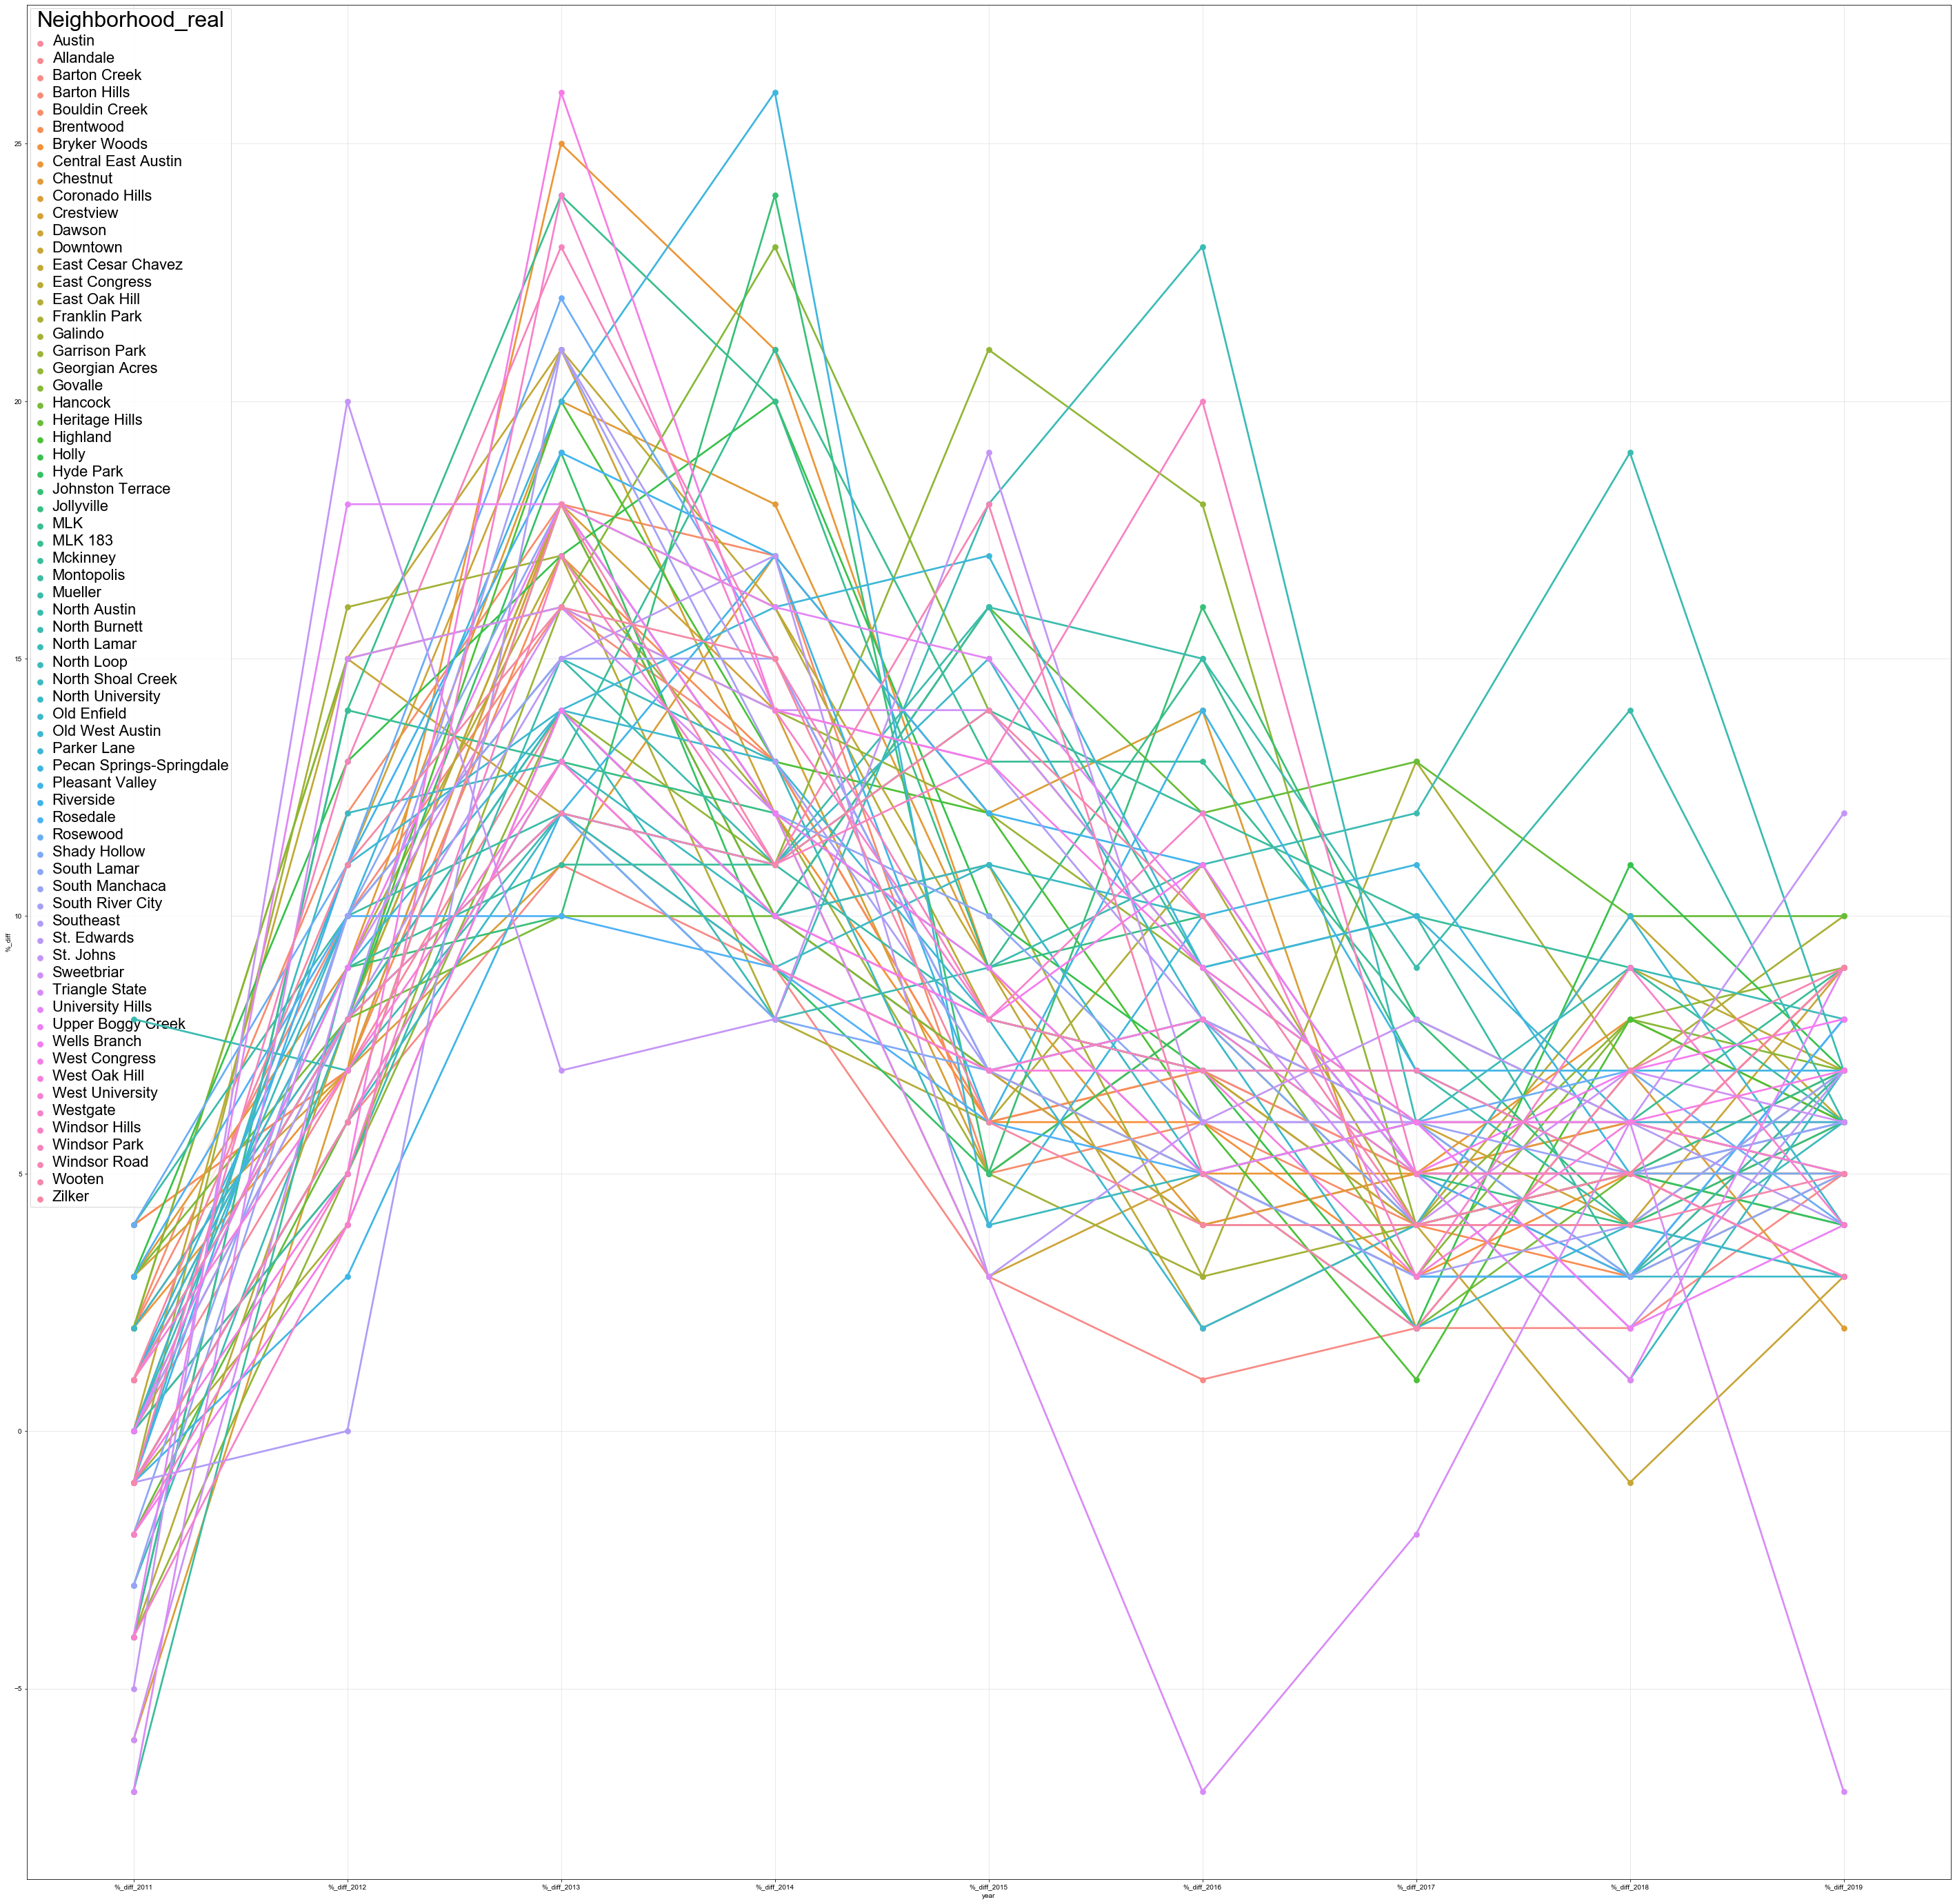

In [26]:
#create sns line plot with hue as neighborhoods
plt.figure(figsize=(50,50))
ax = sns.pointplot(x='year', y='%_diff', hue='Neighborhood_real',data=df2)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)

#change legend text size
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

#change axis text size
#plt.rcParams["axes.labelsize"] = 100

#change axis tick labels size
sns.set(font_scale = 1)

plt.show()

In [28]:
#replace negative numbers with 0 and drop zeros
df2[df2['%_diff_non_neg'] < 0] = 0
df2['%_diff_non_neg'].unique()

array([ 0,  7, 14, 10,  8,  5,  4, 18,  6, 11,  9,  3,  1,  2, 16, 13, 12,
       17, 25, 21, 20, 15, 23, 19, 24, 26, 22])

In [ ]:
#drop 0 from rows
df2 = df2.drop(df2[df2['Neighborhood_real'].eq(0)].index)

In [75]:
#scatter plot
fig = px.scatter(df2, 
                 x="year", 
                 y="%_diff_non_neg", 
                 color="Neighborhood_real",
                 size='%_diff_non_neg', 
                 hover_data=['%_diff_non_neg'])
fig.show()

In [44]:
#line plot
layout = "Austin Housing Price Percent Changes YoY by Neighborhood"
fig = px.line(df2, title=layout, x="year", y="%_diff", 
              color="Neighborhood_real", 
              hover_name="Neighborhood_real",
              line_shape="spline", render_mode="svg")
fig.show()
#fig.write_html("path/to/file.html") 
#plotly.offline.plot(fig, filename = 'austin_housing_prices.html', auto_open=True)

In [48]:
#sort %_diff descending
df2.sort_values(by='%_diff',ascending=False)

year  %_diff         Neighborhood_real  %_diff_non_neg
593  %_diff_2013    26.0             West Congress              26
424  %_diff_2014    26.0  Pecan Springs-Springdale              26
73   %_diff_2013    25.0       Central East Austin              25
264  %_diff_2014    24.0          Johnston Terrace              24
623  %_diff_2013    24.0                  Westgate              24
..           ...     ...                       ...             ...
181  %_diff_2011     0.0             Garrison Park               0
311  %_diff_2011     0.0                Montopolis               0
361  %_diff_2011     0.0                North Loop               0
571  %_diff_2011     0.0         Upper Boggy Creek               0
1    %_diff_2011     0.0                    Austin               0

[578 rows x 4 columns]

In [64]:
#sum %_diff by neighborhoods and sort desc
df2.groupby('Neighborhood_real').sum().sort_values(by='%_diff'\
                                                   ,ascending=False).reset_index()[['Neighborhood_real','%_diff']]

Neighborhood_real  %_diff
0                MLK   101.0
1            Govalle    97.0
2            MLK 183    97.0
3     Heritage Hills    95.0
4        North Lamar    94.0
..               ...     ...
63          Downtown    56.0
64  North University    55.0
65           Hancock    54.0
66    Triangle State    52.0
67      Barton Creek    39.0

[68 rows x 2 columns]

In [73]:
#bar plot ordered desc
fig = px.bar(df2,
             x='Neighborhood_real',
             y='%_diff',
             hover_data=['Neighborhood_real', '%_diff'],
             color='Neighborhood_real')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [81]:
#create year column
df2['year_real'] = df2['year'].str[-4:].astype(int)

In [91]:
#scatter plot
px.scatter(df2, x="year_real", 
           y="%_diff", 
           animation_frame="year_real", 
           animation_group="year_real",
           size="%_diff", 
           color="Neighborhood_real", 
           hover_name="Neighborhood_real",
           log_x=True, size_max=55, range_x=[2010,2020], range_y=[-10,30])

In [104]:
#del column
#del df2['count_of_percents']

In [105]:
#create frequency of %_diff column
df2['%_freq'] = df2.groupby('%_diff')['%_diff'].transform('count')

year  %_diff Neighborhood_real  %_diff_non_neg  year_real  %_freq
1   %_diff_2011     0.0            Austin               0       2011      12
2   %_diff_2012     7.0            Austin               7       2012      51
3   %_diff_2013    14.0            Austin              14       2013      23
4   %_diff_2014    10.0            Austin              10       2014      33
5   %_diff_2015     8.0            Austin               8       2015      44
6   %_diff_2016     7.0            Austin               7       2016      51
7   %_diff_2017     5.0            Austin               5       2017      57
8   %_diff_2018     5.0            Austin               5       2018      57
9   %_diff_2019     5.0            Austin               5       2019      57
11  %_diff_2011     4.0         Allandale               4       2011      42
12  %_diff_2012     7.0         Allandale               7       2012      51
13  %_diff_2013    18.0         Allandale              18       2013      15
14  %_diff_2014    10.0         Allandale              10       2014      33
15  %_diff_2015     7.0         Allandale               7       2015      51
16  %_diff_2016     4.0         Allandale               4       2016      42
17  %_diff_2017     5.0         Allandale               5       2017      57
18  %_diff_2018     6.0         Allandale               6       2018      53
19  %_diff_2019     6.0         Allandale               6       2019      53
22  %_diff_2012     6.0      Barton Creek               6       2012      53
23  %_diff_2013    11.0      Barton Creek              11       2013      25
24  %_diff_2014     9.0      Barton Creek               9       2014      40
25  %_diff_2015     3.0      Barton Creek               3       2015      34
26  %_diff_2016     1.0      Barton Creek               1       2016      14
27  %_diff_2017     2.0      Barton Creek               2       2017      19
28  %_diff_2018     2.0      Barton Creek               2       2018      19
29  %_diff_2019     5.0      Barton Creek               5       2019      57
31  %_diff_2011     2.0      Barton Hills               2       2011      19
32  %_diff_2012    10.0      Barton Hills              10       2012      33
33  %_diff_2013    16.0      Barton Hills              16       2013      15
34  %_diff_2014    13.0      Barton Hills              13       2014      20
35  %_diff_2015     6.0      Barton Hills               6       2015      53
36  %_diff_2016     7.0      Barton Hills               7       2016      51
37  %_diff_2017     5.0      Barton Hills               5       2017      57
38  %_diff_2018     3.0      Barton Hills               3       2018      34
39  %_diff_2019     7.0      Barton Hills               7       2019      51
41  %_diff_2011     2.0     Bouldin Creek               2       2011      19
42  %_diff_2012    12.0     Bouldin Creek              12       2012      26
43  %_diff_2013    18.0     Bouldin Creek              18       2013      15
44  %_diff_2014    17.0     Bouldin Creek              17       2014      11
45  %_diff_2015     5.0     Bouldin Creek               5       2015      57
46  %_diff_2016     6.0     Bouldin Creek               6       2016      53
47  %_diff_2017     4.0     Bouldin Creek               4       2017      42
48  %_diff_2018     5.0     Bouldin Creek               5       2018      57
49  %_diff_2019     9.0     Bouldin Creek               9       2019      40
51  %_diff_2011     4.0         Brentwood               4       2011      42
52  %_diff_2012     7.0         Brentwood               7       2012      51
53  %_diff_2013    17.0         Brentwood              17       2013      11
54  %_diff_2014    13.0         Brentwood              13       2014      20
55  %_diff_2015     6.0         Brentwood               6       2015      53
56  %_diff_2016     7.0         Brentwood               7       2016      51

In [116]:
#scatter plot
fig = px.scatter(df2, 
                 x="%_freq", 
                 y="%_diff", 
                 title="Frequency of Percent change", 
                 color="%_diff",
                 size="%_freq", 
                 hover_data=["%_diff"])
fig.show()